In [5]:
# load SVM results
import os
import glob
import pickle

svm_results_dir = 'X:\\scratch\\ADNI\\Results'
svm_results_files = [ file for file in glob.glob(os.path.join(svm_results_dir,'ADNI*Vox-2020*','results.pickle'))]
print(svm_results_files)

features = {'/scratch/ebron/ADNI/adni_all_t1_baseline_masked.csv': 'T1-weighted images',
            '/scratch/ebron/ADNI/adni_all_baseline_masked.csv': 'Modulated GM maps'            
            }

# #Remove results with other random seed than 0
# for svm_results_file in svm_results_files.copy():
#     p = pickle.load(open(svm_results_file,'rb'))
#     print(p)
#     if 'random_state' in p.keys():
#         if p['random_state']!=0:
#             svm_results_files.remove(svm_results_file)
#             continue
#     if 'Labels' in p.keys():
#         if 'MCIc' in p['Labels']:
#             svm_results_files.remove(svm_results_file)
#             continue
#     if p['N_splits']!=20:
#         svm_results_files.remove(svm_results_file)
#         continue
        
#     if not p['DataIn'][0] in features:
#         svm_results_files.remove(svm_results_file)

svm_auc_means, svm_auc_cis, svm_acc_means, svm_acc_cis, svm_features = [], [], [], [], [] 
for svm_results_file in svm_results_files:
    p = pickle.load(open(svm_results_file,'rb'))
    print(p.keys())
    print(p['N_splits'])
    
    svm_auc_means.append(p['auc_mean'])
    svm_auc_cis.append(p['auc_95ci'])
    svm_acc_means.append(p['acc_mean'])
    svm_acc_cis.append(p['acc_95ci'])
    svm_features.append(features[p['DataIn'][0]])
    svm_label = f"SVM" #with {p['N_splits']} iterations
 
print(svm_auc_means)
print(svm_auc_cis)
print(svm_acc_means)
print(svm_acc_cis)

['X:\\scratch\\ADNI\\Results\\ADNI-T1-Vox-2020-10-27-14-18-38\\results.pickle', 'X:\\scratch\\ADNI\\Results\\ADNI-Vox-2020-10-27-14-53-38\\results.pickle']
dict_keys(['DataIn', 'DataTest', 'Labels', 'Factors', 'Biomarkers_exclude', 'ResultsFile', 'SaveResults', 'TempDirectory', 'InputTempFile', 'Type', 'TestClass', 'Iterations', 'N_splits', 'test_size', 'Kernel', 'DataDescription', 'UseSavedModel', 'DataInDirectory', 'DataTestDirectory', 'ResultsFolder', 'Timepoints', 'conf', 'best_c_values', 'accs', 'aucs', 'c_mean', 'c_std', 'acc_mean', 'acc_std', 'acc_95ci', 'auc_mean', 'auc_std', 'auc_95ci', 'computation_time[s]', 'nFeatures', 'nTrain', 'nClasses', 'ResultsDump', 'train', 'test', 'SubjectID'])
20
dict_keys(['DataIn', 'DataTest', 'Labels', 'Factors', 'Biomarkers_exclude', 'ResultsFile', 'SaveResults', 'TempDirectory', 'InputTempFile', 'Type', 'TestClass', 'Iterations', 'N_splits', 'test_size', 'Kernel', 'DataDescription', 'UseSavedModel', 'DataInDirectory', 'DataTestDirectory', 'Res

In [3]:
# load CNN results

import numpy as np
import os

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

cnn_auc_means, cnn_auc_cis, cnn_acc_means, cnn_acc_cis, cnn_features = [], [], [], [], []  
features_cnn = {'T1': 'T1-weighted images','GM': 'Modulated GM maps'
            }

experiments=['4869_T1_WB_AD_allCNN','4799_GM_WB_AD_allCNN']

for exp in experiments:
    results = np.load(os.path.join('W:','results', exp, 'results.npy')).item()['test']
    test_results = np.load(os.path.join('W:','results', exp, 'test_results.npy')).item()
    cnn_auc_means.append(test_results['auc_mean'])
    cnn_auc_cis.append(test_results['auc_95ci'])
    cnn_acc_means.append(test_results['acc_mean'])
    cnn_acc_cis.append(test_results['acc_95ci'])
    cnn_features_temp = exp.split('_')[1]
    cnn_features.append(features_cnn[cnn_features_temp])
    
cnn_label = f"CNN" #with {len(results['auc'])} iterations

print(results.keys())
print(cnn_auc_means)
print(cnn_auc_cis)
print(cnn_features)

# restore np.load for future normal usage
np.load = np_load_old


FileNotFoundError: [Errno 2] No such file or directory: 'W:results\\4869_T1_WB_AD_allCNN\\results.npy'

In [3]:
# Function for plot labels
def autolabel(rects, xpos='center',decimals=2):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        float_format = '{:.' + str(decimals) + 'f}'
        ax.annotate(float_format.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')

[0.8976244343891402, 0.9331447963800905]


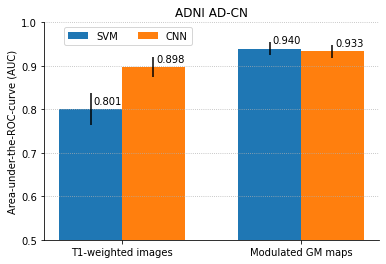

In [5]:
# Make plot
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

from itertools import repeat

what='AUC'

if what=='AUC':
    svm_auc_means = svm_auc_means+list(repeat(0, len(cnn_auc_means)-len(svm_auc_means))) 
    cnn_auc_means = cnn_auc_means+list(repeat(0, len(svm_auc_means)-len(cnn_auc_means)))

    svm_auc_cis = svm_auc_cis+list(repeat([0,0], len(cnn_auc_cis)-len(svm_auc_cis))) 
    cnn_auc_cis = cnn_auc_cis+list(repeat([0,0], len(svm_auc_cis)-len(cnn_auc_cis)))
else:
    svm_auc_means = svm_acc_means+list(repeat(0, len(cnn_acc_means)-len(svm_acc_means))) 
    cnn_auc_means = cnn_acc_means+list(repeat(0, len(svm_acc_means)-len(cnn_acc_means)))

    svm_auc_cis = svm_acc_cis+list(repeat([0,0], len(cnn_acc_cis)-len(svm_acc_cis))) 
    cnn_auc_cis = cnn_acc_cis+list(repeat([0,0], len(svm_acc_cis)-len(cnn_acc_cis)))    

ind = np.arange(len(svm_auc_means))  # the x locations for the groups
width = 0.35  # the width of the bars

svm_auc_err = [svm_auc_means[i] - svm_auc_cis[i][1] for i in range(len(svm_auc_cis))]
cnn_auc_err = [cnn_auc_means[i] - cnn_auc_cis[i][1] for i in range(len(cnn_auc_cis))]

print(cnn_auc_means)

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, svm_auc_means, width,  yerr=svm_auc_err,
                label=svm_label)
rects2 = ax.bar(ind + width/2, cnn_auc_means, width,  yerr=cnn_auc_err,
                label=cnn_label)

# Add some text for labels, title and custom x-axis tick labels, etc.
if what=='AUC':
    ax.set_ylabel('Area-under-the-ROC-curve (AUC)')
else:
    ax.set_ylabel('Accuracy')
ax.set_title('ADNI AD-CN')
ax.set_xticks(ind)
ax.set_xticklabels(cnn_features)
ax.set_ylim([0.5,1])
ax.grid(axis='y', linestyle='dotted')
lgd = ax.legend(loc='upper center', bbox_to_anchor=(0.25, 1), ncol=2)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

autolabel(rects1, "right", 3)
autolabel(rects2, "right", 3)

#fig.tight_layout()

plt.show()

# Converting datetime object to string
dateTimeObj = datetime.now()
 
timestampStr = dateTimeObj.strftime("%d-%b-%Y_%H-%M")

if what=='AUC':
    figure_name = f'Plot1_ADCN_CNNSVM_CI_{timestampStr}'
else:
    figure_name = f'Plot1_ADCN_CNNSVM_Acc_CI_{timestampStr}'
fig.savefig(figure_name, dpi=300, facecolor='w', edgecolor='w', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [4]:
df_svm

NameError: name 'df_svm' is not defined